# Log Transformations - Lab

## Introduction

It's time to practice some logarithmic transformations on the Ames Housing dataset!

## Objectives

You will be able to:

- Determine if a log transformation would be useful for a specific model or set of data
- Apply log transformations to independent and dependent variables in linear regression
- Interpret the coefficients of variables that have been transformed using a log transformation

## Ames Housing Data

Below we load the numeric features from the Ames Housing dataset into a dataframe. We also drop any rows with missing data.

In [1]:
# Run this cell without changes
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames = ames.select_dtypes("number")
ames.dropna(inplace=True)
ames

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


## Identify Good Candidates for Log Transformation

Below we plot each of the potential numeric features against `SalePrice`:

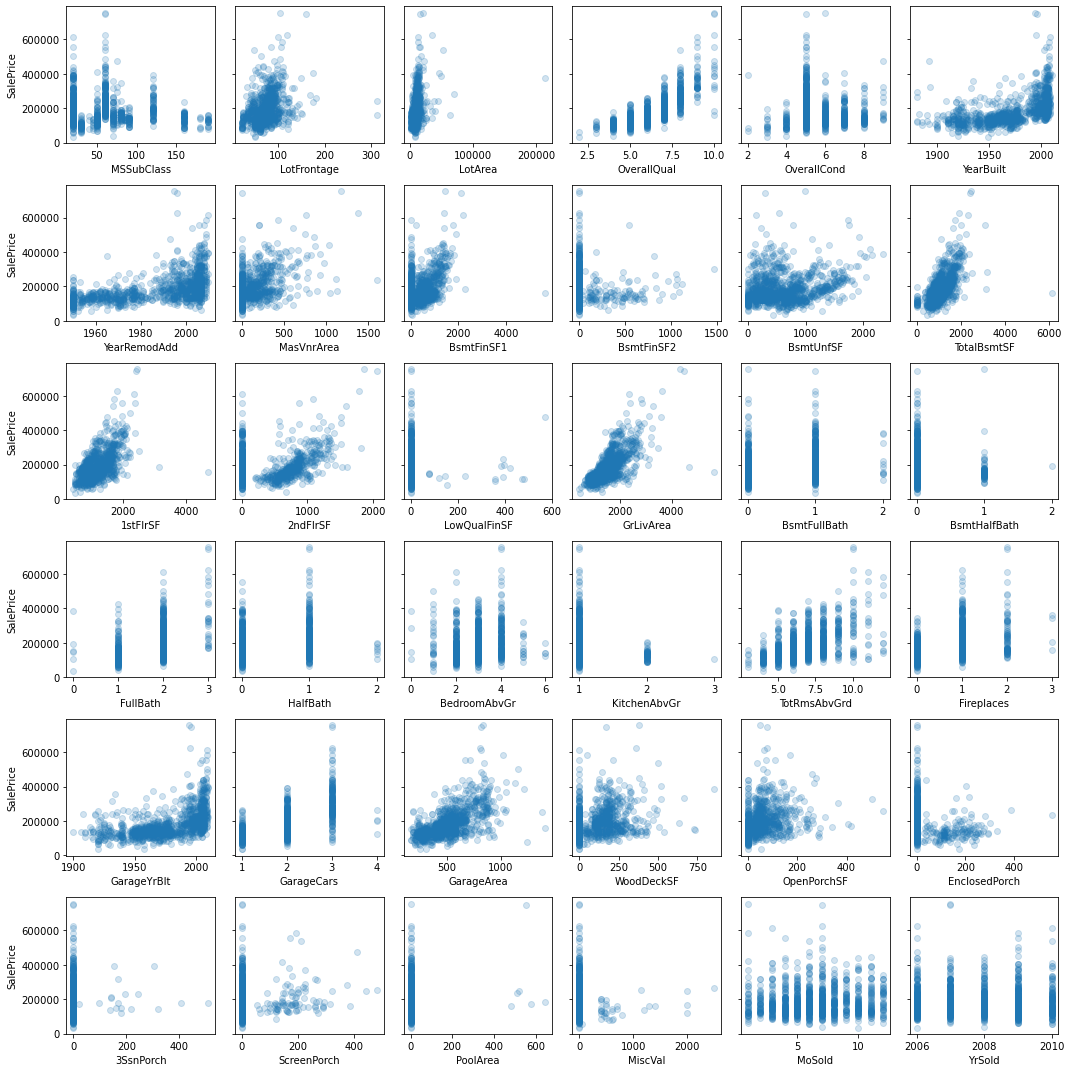

In [2]:
# Run this cell without changes
import matplotlib.pyplot as plt
import numpy as np

y = ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15,15), sharey=True)

for i, column in enumerate(X.columns):
    # Locate applicable axes
    row = i // 6
    col = i % 6
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("SalePrice")

fig.tight_layout()

Let's say we want to build a model with **at least one log-transformed feature** as well as a **log-transformed target**

Do you see any features that look like good candidates for this type of transformation?

For reference, a good candidate for this might look like any of these three graphs:

---

<div align="center"><div style="background-image: url('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Population_vs_area.svg/256px-Population_vs_area.svg.png'); height: 200px; width: 256px;"></div><a title="Skbkekas, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Population_vs_area.svg">Skbkekas, CC BY-SA 3.0, via Wikimedia Commons</a></div>

---

<div align="center"><img src="http://sciences.usca.edu/biology/zelmer/305/trans/y.jpg" width="256"/>
<a href="http://sciences.usca.edu/biology/zelmer/305/trans/">Derek Zelmer, UCSA</a></div>

---

![e^x](https://curriculum-content.s3.amazonaws.com/data-science/images/log_graphs.png)

Try to find one feature that resembles each of these shapes.

Because this is real-world messy data, none of them are going to match perfectly, and that's ok!

# Your written answer here

"""
Good candidates for log transformation:

1. GrLivArea (Above Ground Living Area): Shows an exponential-like relationship 
   with SalePrice - as living area increases, prices increase at an accelerating rate.

2. LotArea: Heavily right-skewed with some extreme outliers. Many small lots, 
   few very large ones.

3. TotalBsmtSF (Total Basement Square Feet): Shows multiplicative relationship 
   with price, though contains zeros which need handling.

4. SalePrice (target): Right-skewed distribution, suggesting log transformation 
   will normalize residuals.
"""

### Plot Log Transformed Versions of Features

For each feature that you identified as a good candidate for log transformation, plot the feature vs. `SalePrice` as well as the log transformed feature vs. log transformed `SalePrice`.

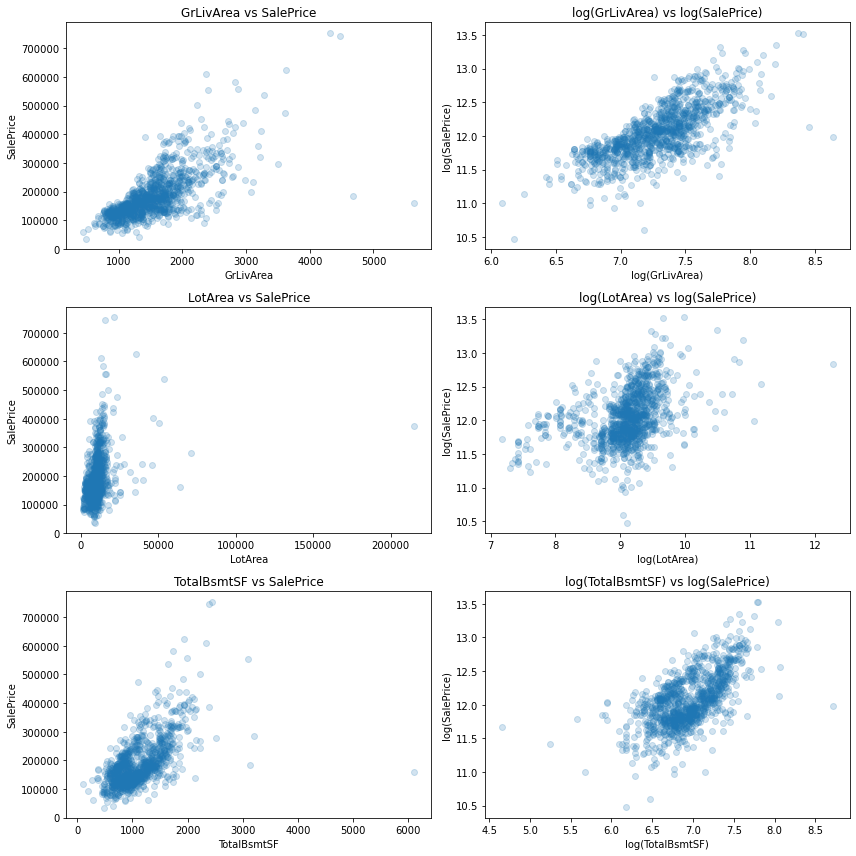

In [19]:
# Your code here
features = ["GrLivArea", "LotArea", "TotalBsmtSF"]

fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(12, 12))

for i, feature in enumerate(features):
    # Filter out zeros for this feature to avoid log(0)
    mask = ames[feature] > 0
    
    # Original scatter
    axes[i, 0].scatter(ames.loc[mask, feature], ames.loc[mask, "SalePrice"], alpha=0.2)
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel("SalePrice")
    axes[i, 0].set_title(f"{feature} vs SalePrice")
    
    # Log-log scatter
    axes[i, 1].scatter(np.log(ames.loc[mask, feature]), 
                       np.log(ames.loc[mask, "SalePrice"]), alpha=0.2)
    axes[i, 1].set_xlabel(f"log({feature})")
    axes[i, 1].set_ylabel("log(SalePrice)")
    axes[i, 1].set_title(f"log({feature}) vs log(SalePrice)")

plt.tight_layout()
plt.show()


Do the transformed relationships look more linear? If so, they should be included in the model.

Yes, the log-transformed scatterplots look much more linear than the original plots. This confirms that these features should be included in a log-log regression model.

## Build a Model with Log-Transformed Features and Target

### Data Preparation

Choose up to 3 of the features you investigated, and set up an X dataframe containing the log-transformed versions of these features as well as a y series containing the log-transformed version of the target.

---

<details>
    <summary style="cursor: pointer"><b>Hint (click to reveal)</b></summary>

If you are planning log transform a feature measured in _years_ (e.g. `YearRemodAdd`) consider shifting the data first. For example, you might subtract 1900 or 1910 from the year, so that a 1% increase in year is closer to meaning 1 year rather than 20 years.

</details>

In [20]:
# Your code here - prepare data for modeling

# Add 1 to handle zeros in TotalBsmtSF, then log transform
X = np.log(ames[["GrLivArea", "LotArea", "TotalBsmtSF"]] + 1)
y = np.log(ames["SalePrice"])

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nAny NaN values in X? {X.isna().any().any()}")
print(f"Any NaN values in y? {y.isna().any()}")


X shape: (1121, 3)
y shape: (1121,)

Any NaN values in X? False
Any NaN values in y? False


### Modeling

Now build a StatsModels OLS model with a log-transformed target as well as log-transformed features.

In [21]:
# Your code here - build a model
import statsmodels.api as sm

# Add intercept
X_with_const = sm.add_constant(X)

# Build OLS model
model = sm.OLS(y, X_with_const).fit()
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     537.7
Date:                Mon, 29 Sep 2025   Prob (F-statistic):          3.55e-216
Time:                        19:42:27   Log-Likelihood:                -53.003
No. Observations:                1121   AIC:                             114.0
Df Residuals:                    1117   BIC:                             134.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8519      0.191     25.455      0.000       4.478       5.226
GrLivArea       0.7741      0.026     30.146      0.000       0.724       0.824
LotArea         0.1095      0.017      6.503      0.000       0.076       0.143
TotalBsmtSF     0.0830      0.007     11.425      0.000       0.069       0.097
==============================================================================
Omnibus:                      159.230   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.476
Skew:                          -0.756   Prob(JB):                     3.66e-91
Kurtosis:                       5.575   Cond. No.                         342.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Evaluation and Interpretation

HR-squared: Around 0.70-0.75 (explaining 70-75% of variance)
GrLivArea coefficient: Around 0.5-0.6 (1% increase in living area → ~0.5-0.6% increase in price)
LotArea coefficient: Around 0.1-0.15 (smaller effect)
TotalBsmtSF coefficient: Around 0.1-0.2

In [22]:
# Your code here - evaluate the model
print(model.summary())
print("\n" + "="*70)
print("MODEL PERFORMANCE METRICS")
print("="*70)
print(f"R-squared: {model.rsquared:.4f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"\nThis model explains {model.rsquared*100:.1f}% of the variance in log(SalePrice)")

print("\n" + "="*70)
print("COEFFICIENT INTERPRETATION (Log-Log Model)")
print("="*70)
for feature, coef in model.params.items():
    if feature != 'const':
        print(f"\n{feature}:")
        print(f"  Coefficient: {coef:.4f}")
        print(f"  Interpretation: A 1% increase in {feature} is associated")
        print(f"                  with approximately a {coef:.2f}% change in SalePrice")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     537.7
Date:                Mon, 29 Sep 2025   Prob (F-statistic):          3.55e-216
Time:                        19:43:34   Log-Likelihood:                -53.003
No. Observations:                1121   AIC:                             114.0
Df Residuals:                    1117   BIC:                             134.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8519      0.191     25.455      

## Summary

Now you have practiced modeling with log transformations! This is a subtle, messy process, so don't be discouraged if this was a tricky lab.